# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('liquor_store_sales.csv')
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<Axes: xlabel='ItemType'>

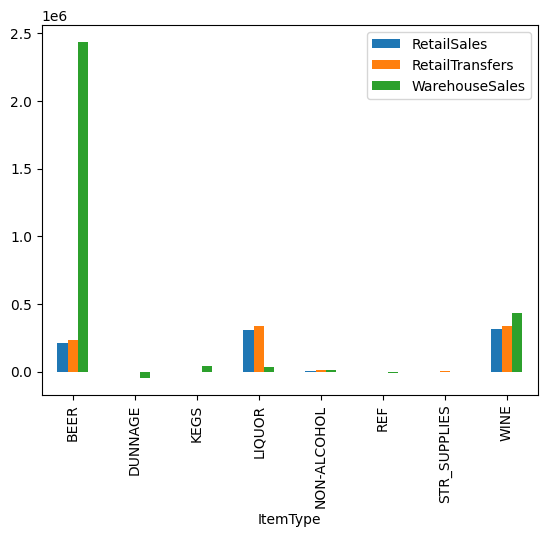

In [3]:
data[["ItemType","RetailSales","RetailTransfers","WarehouseSales"]].groupby(["ItemType"]).agg(sum).plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

,TotalSales
Supplier,
MILLER BREWING COMPANY,646822.71
CROWN IMPORTS,636094.20
ANHEUSER BUSCH INC,583737.97
HEINEKEN USA,362740.01
E & J GALLO WINERY,218180.45
DIAGEO NORTH AMERICA INC,174877.36
CONSTELLATION BRANDS,159983.37
JIM BEAM BRANDS CO,85105.83
THE WINE GROUP,80823.98


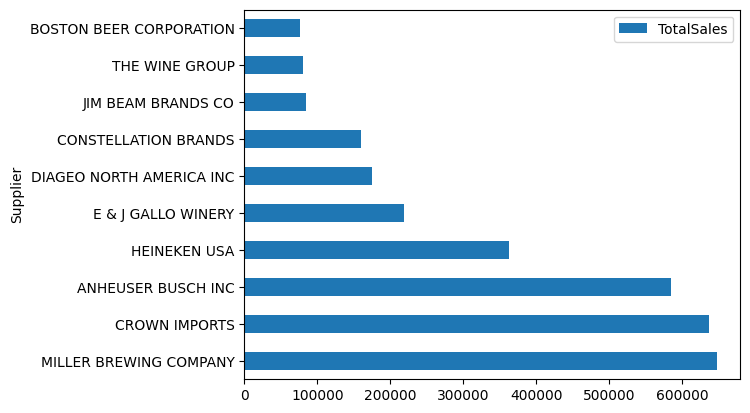

In [4]:
# .barh



data["TotalSales"] = data[["RetailSales","RetailTransfers","WarehouseSales"]].sum(axis=1)

data_plot  = data[["Supplier","ItemType","TotalSales"]].groupby(["Supplier","ItemType"]).sum()
# data[["Supplier","ItemType","TotalSales"]].sort_values(by="TotalSales").iloc[:10,:]
# data.sort_values(by="TotalSales").groupby("Supplier").sum()

data_plot = data_plot.groupby(["Supplier"]).sum(numeric_only=True).sort_values(by="TotalSales", ascending= False).iloc[:10,:] #On veut sort sur la somme des différentes activité mais on veut garder le détails -> Dans la colonne TotalSale on va faire la somme de toutes les activités 

data_plot.plot.barh()

data_plot

In [9]:
data_plot = data[["Supplier","ItemType","RetailSales","RetailTransfers","WarehouseSales"]]

data_plot

data_plot["TotalSales"] = data_plot[["RetailSales","RetailTransfers","WarehouseSales"]].sum(axis=1)

# data_plot['TotalSalesSupplier'] = data_plot.groupby('Supplier').sum() # Equivalent à l'instruction SQL : calculate AVG(value) OVER (PARTITION BY group)


# data_plot.sort_values(by="TotalSalesSupplier", ascending= False).iloc[:10,:]


# data_plot['TotalSalesItemType'] = data_plot.groupby(["Supplier"])["TotalSales"].sum()

# test_df = data_plot[["Supplier","ItemType","TotalSales","TotalSalesSupplier"]].groupby(["Supplier","ItemType"]).sum().sort_values(by=["Supplier","ItemType"])


In [10]:
data_plot[["Supplier","TotalSales"]].groupby('Supplier').sum()

,TotalSales
Supplier,
8 VINI INC,5.78
A HARDY USA LTD,0.40
A I G WINE & SPIRITS,152.44
A VINTNERS SELECTIONS,46778.34
A&E INC,13.52
...,...
WINEBOW INC,-0.34
YOUNG WON TRADING INC,4634.95
YUENGLING BREWERY,74284.84


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [11]:
data.head(10)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,1.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,1.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,4.0
5,2017,4,REPUBLIC NATIONAL DISTRIBUTING CO,101680,MANISCHEWITZ CREAM WH CONCORD - 1.5L,WINE,0.0,1.0,0.0,1.0
6,2017,4,ROYAL WINE CORP,101753,BARKAN CLASSIC PET SYR - 750ML,WINE,0.0,1.0,0.0,1.0
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,32.0,0.0,32.0
8,2017,4,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,0.0,26.0,0.0,26.0
9,2017,4,MONSIEUR TOUTON SELECTION,102083,CH DE LA CHESNAIE MUSCADET - 750ML,WINE,0.0,1.0,0.0,1.0


In [12]:
data_plot = data[["Month","RetailSales","RetailTransfers","WarehouseSales"]].pivot_table(index="Month")

data_plot

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


<Axes: xlabel='Month'>

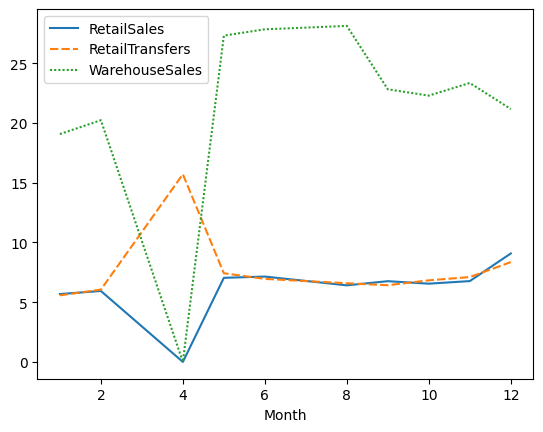

In [13]:
sns.lineplot(data = data_plot)

## 4. Plot the same information as above but as a bar chart.

In [14]:
data_plot["Month"] = data_plot.index #Tant que c'est en index, impossible de plot 
data_plot["Month"]

Month
1      1
2      2
4      4
5      5
6      6
8      8
9      9
10    10
11    11
12    12
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='WarehouseSales'>

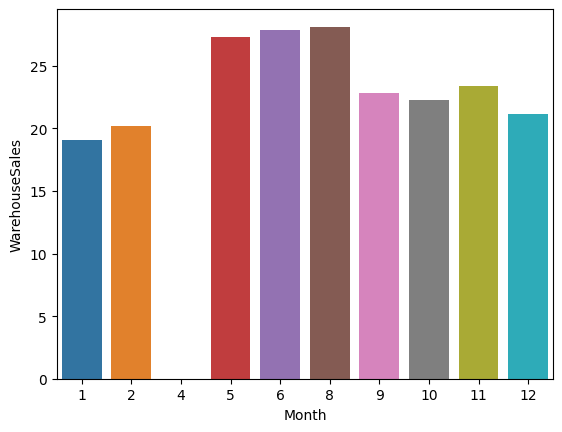

In [15]:
sns.barplot(data = data_plot, x = "Month", y="WarehouseSales")

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

<Axes: xlabel='Date'>

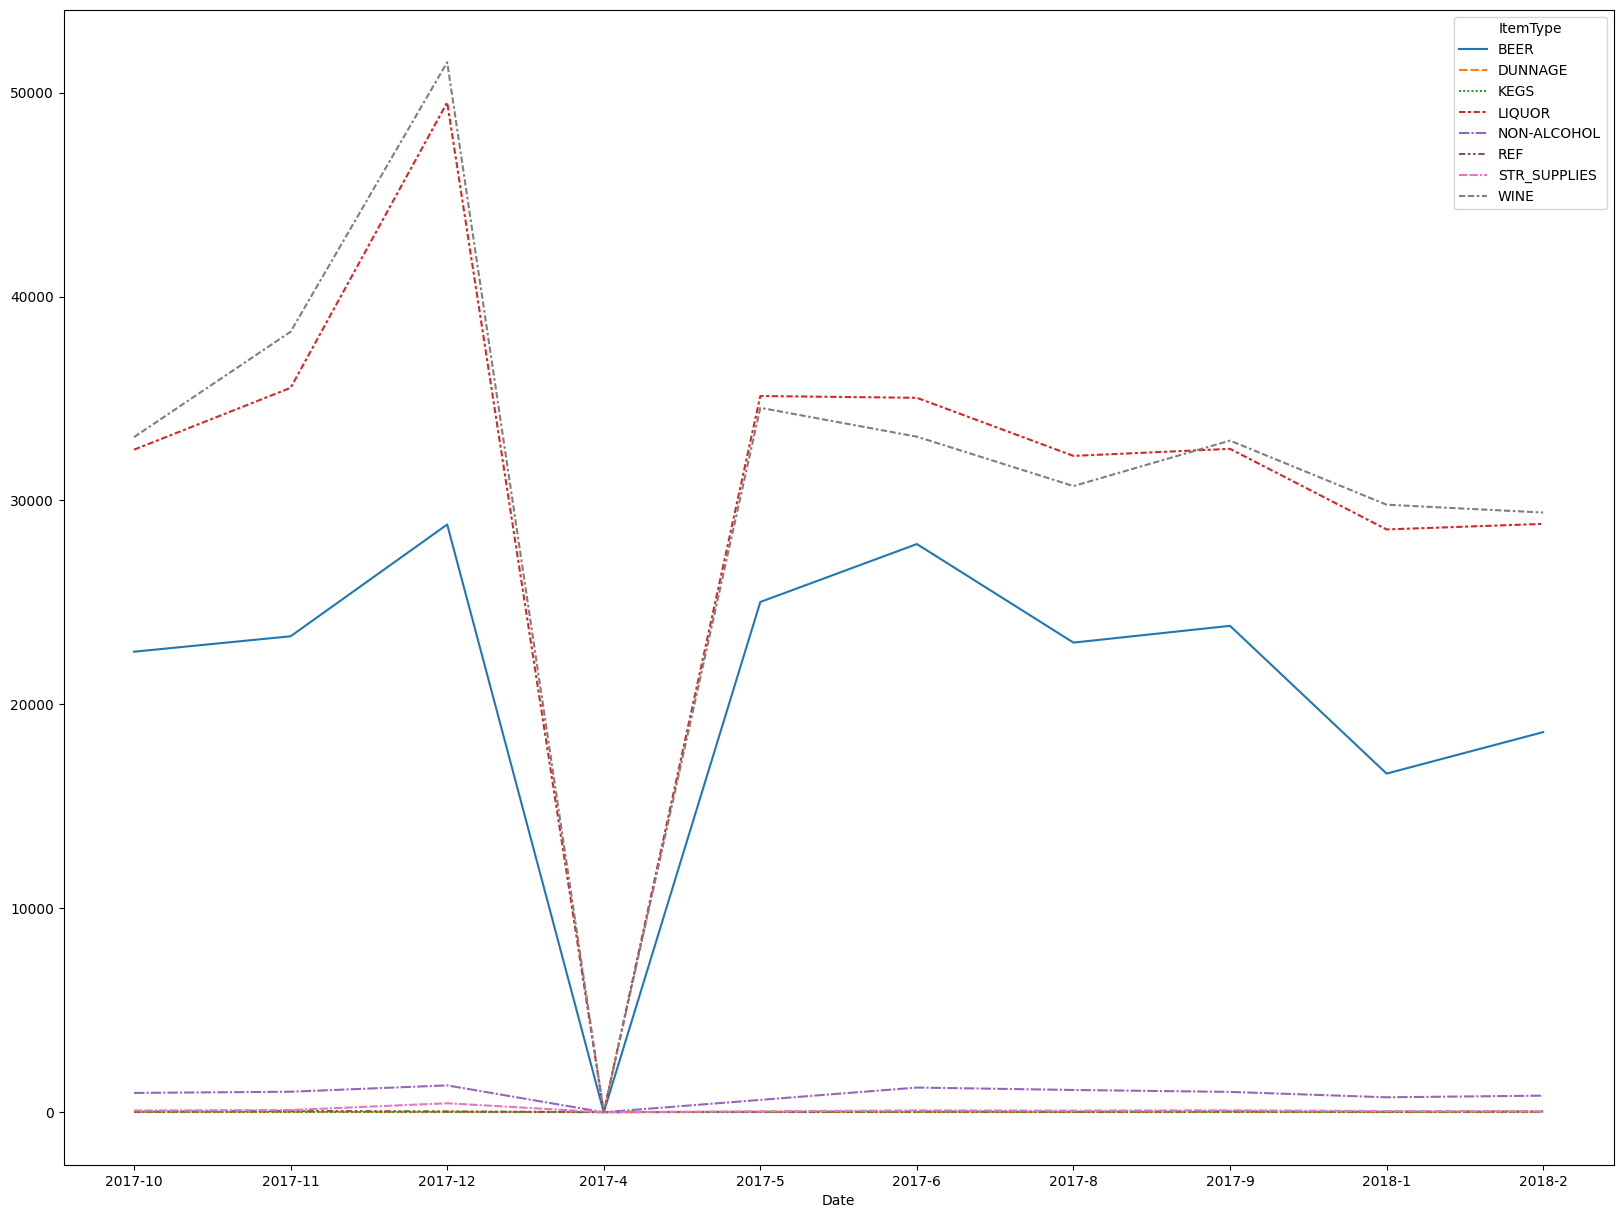

In [17]:
data_plot = data

#Create a "Date" column which concatate "Year" and "Month" informations
data_plot["Date"] = data_plot["Year"].astype(str) + "-" + data_plot["Month"].astype(str)

#Create a column wich sum RetailSales per ItemType
data_plot = data[["Date","ItemType","RetailSales"]].pivot_table(index=["Date","ItemType"], aggfunc= np.sum)
data_plot = data_plot.unstack(level="ItemType") #Du génie !!!
data_plot.columns = data_plot.columns.droplevel(0)

fig = plt.figure(figsize=(20,15))
sns.lineplot(data_plot)

## 6. Plot the same information as above but as a bar chart.

<Axes: xlabel='ItemType'>

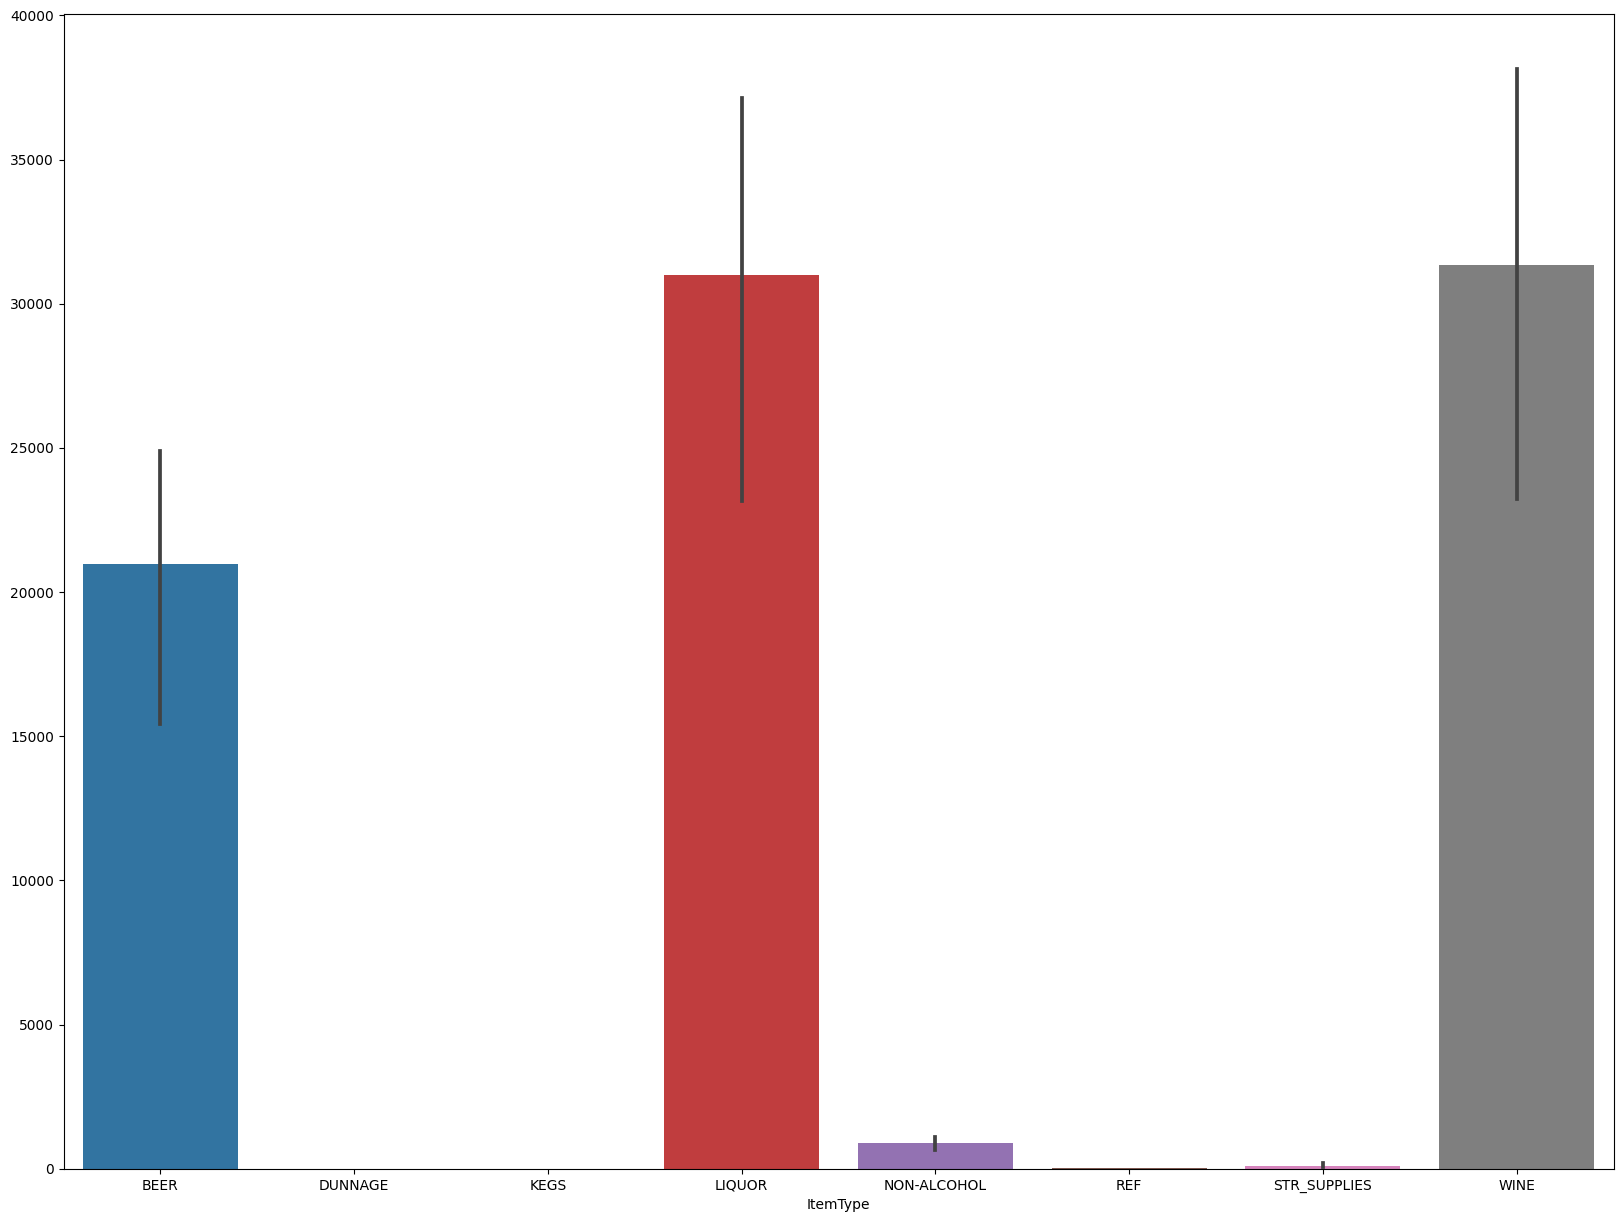

In [ ]:
fig = plt.figure(figsize=(20,15))
sns.barplot(data_plot)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [19]:
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales,Date
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0,1.00,2017-4
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0,1.00,2017-4
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0,8.00,2017-4
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0,2.00,2017-4
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0,4.00,2017-4
...,...,...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0,337.46,2018-2
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0,51.08,2018-2
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0,32.00,2018-2
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0,-35.00,2018-2


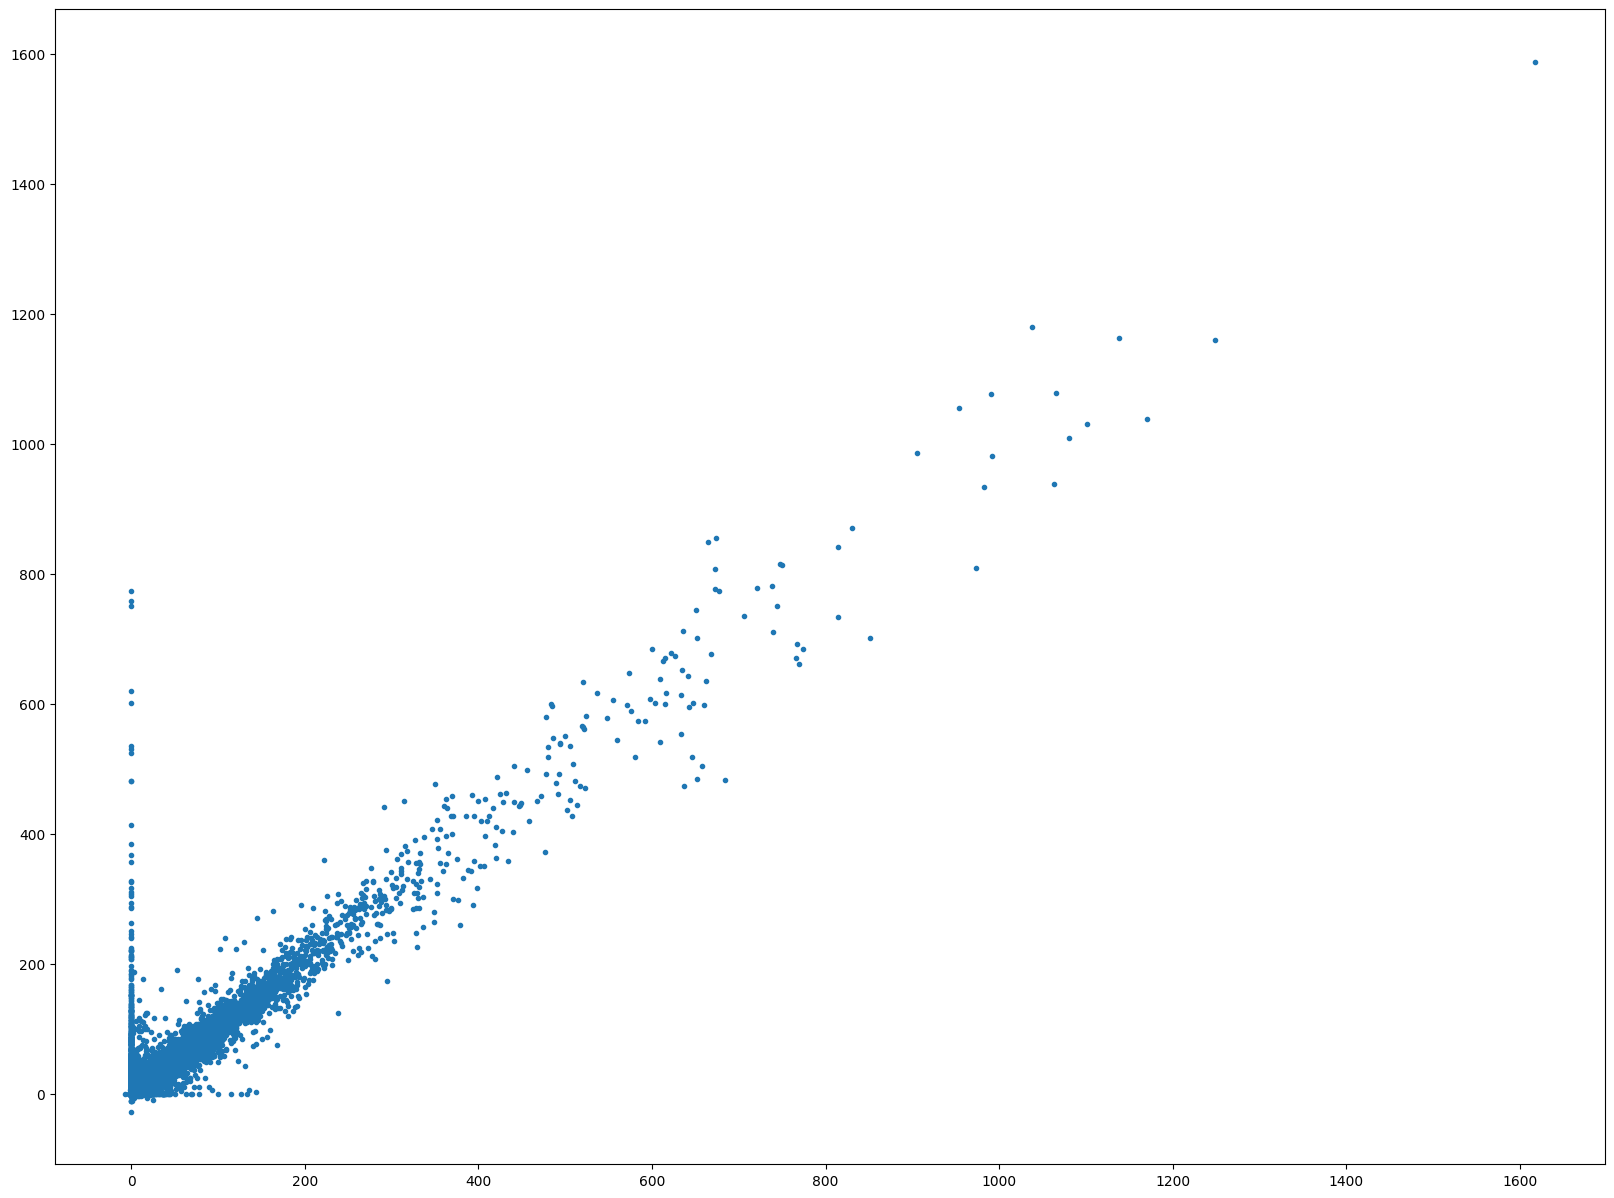

In [24]:
fig = plt.figure(figsize=(20,15))
ax = fig.subplots()
ax.plot(data["RetailSales"],data["RetailTransfers"], linestyle = "None", marker = ".")

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [7]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [5]:
import seaborn as sns

In [8]:
fig = plt.figure(figsize=(20,15))
data_plot = data[["Year","Month","ItemCode","RetailSales","RetailTransfers","WarehouseSales"]]

<Figure size 2000x1500 with 0 Axes>

In [9]:
sns.pairplot(data_plot)

KeyboardInterrupt: 